Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download yfinance
!pip install yfinance

In [3]:
import yfinance as yf
df = yf.download("FFC.KA", start="2010-01-01", end="2025-12-24")
# Make sure index is datetime
df.index = pd.to_datetime(df.index)
df.head()

/tmp/ipython-input-2690952248.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("FFC.KA", start="2010-01-01", end="2025-12-24")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,FFC.KA,FFC.KA,FFC.KA,FFC.KA,FFC.KA
Date,,,,,
2010-01-01,8.41622,8.41622,8.41622,8.41622,0
2010-01-04,8.41622,8.41622,8.41622,8.41622,0
2010-01-05,8.41622,8.41622,8.41622,8.41622,0
2010-01-06,8.41622,8.41622,8.41622,8.41622,0
2010-01-07,8.41622,8.41622,8.41622,8.41622,0


In [4]:
# Remove multi-level columns
df.columns = df.columns.droplevel(1)

# Check result
df.head()


Price,Close,High,Low,Open,Volume
Date,,,,,
2010-01-01,8.41622,8.41622,8.41622,8.41622,0
2010-01-04,8.41622,8.41622,8.41622,8.41622,0
2010-01-05,8.41622,8.41622,8.41622,8.41622,0
2010-01-06,8.41622,8.41622,8.41622,8.41622,0
2010-01-07,8.41622,8.41622,8.41622,8.41622,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4149 entries, 2010-01-01 to 2025-12-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4149 non-null   float64
 1   High    4149 non-null   float64
 2   Low     4149 non-null   float64
 3   Open    4149 non-null   float64
 4   Volume  4149 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 194.5 KB


In [6]:
# Is there sny missing value
df.isnull().sum()

,0
Price,
Close,0
High,0
Low,0
Open,0
Volume,0


In [7]:
# Statistical Summary
df.describe()

Price,Close,High,Low,Open,Volume
count,4149.000000,4149.000000,4149.000000,4149.000000,4.149000e+03
mean,69.845039,70.619761,69.146453,69.827872,1.441986e+06
std,96.134764,97.520875,94.975586,96.119645,1.702695e+06
min,8.416220,8.416220,8.416220,8.416220,0.000000e+00
25%,28.507200,28.705034,28.209271,28.423920,4.372300e+05
50%,40.333763,40.674089,40.004706,40.302179,8.965740e+05
75%,60.701275,61.208853,60.441460,60.771874,1.800600e+06
max,593.109985,599.000000,584.020020,594.099976,2.103140e+07


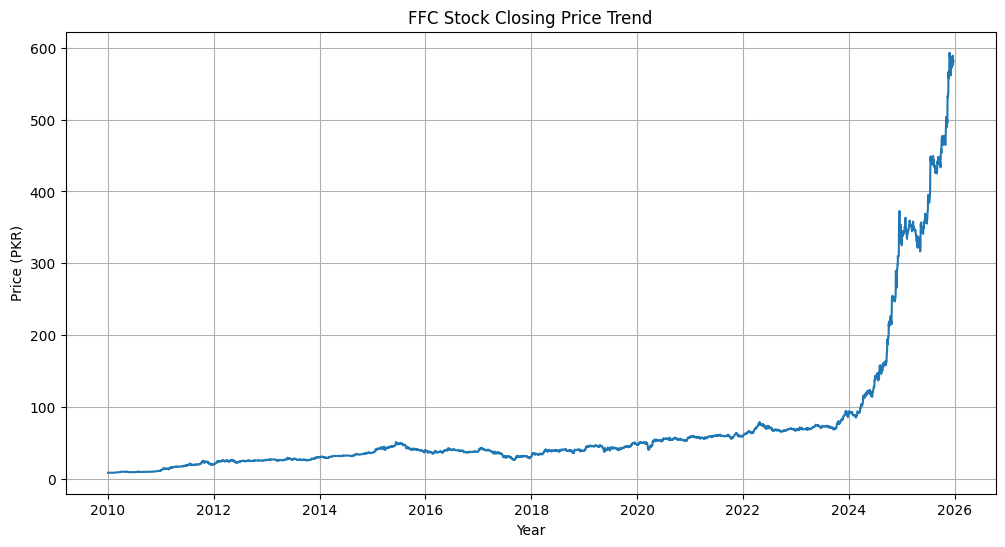

In [8]:
# This will tell us long term trend
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'])
plt.title("FFC Stock Closing Price Trend")
plt.xlabel("Year")
plt.ylabel("Price (PKR)")
plt.grid(True)
plt.show()

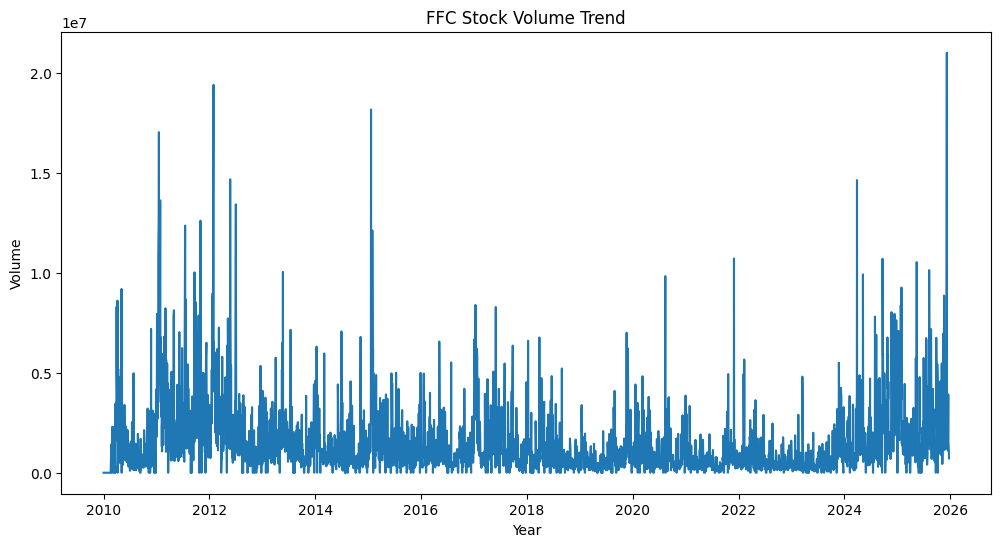

In [9]:
# This will tell us when market activity is more.
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Volume'])
plt.title("FFC Stock Volume Trend")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.show()

In [10]:
# Now perform some feature engineering
df['Prev_Close'] = df['Close'].shift(1)
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['Return'] = df['Close'].pct_change()
df.dropna(inplace=True)
df.head()

Price,Close,High,Low,Open,Volume,Prev_Close,MA_5,MA_10,Return
Date,,,,,,,,,
2010-01-14,8.41622,8.41622,8.41622,8.41622,0,8.41622,8.41622,8.41622,0.0
2010-01-15,8.41622,8.41622,8.41622,8.41622,0,8.41622,8.41622,8.41622,0.0
2010-01-18,8.41622,8.41622,8.41622,8.41622,0,8.41622,8.41622,8.41622,0.0
2010-01-19,8.41622,8.41622,8.41622,8.41622,0,8.41622,8.41622,8.41622,0.0
2010-01-20,8.41622,8.41622,8.41622,8.41622,0,8.41622,8.41622,8.41622,0.0


In [11]:
# Now Train, Test, Split
from sklearn.model_selection import train_test_split
X = df[['Prev_Close', 'MA_5', 'MA_10', 'Return']]
y = df['Close']
split = int(len(df)* 0.8)
X_train = X.iloc[:split]
X_test = X.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]

In [12]:
# Now we will use Random Forest Model  for prediction
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))

MAE : 126.73841277200819
RMSE: 197.9547694222315
R2  : -0.6529355386336162


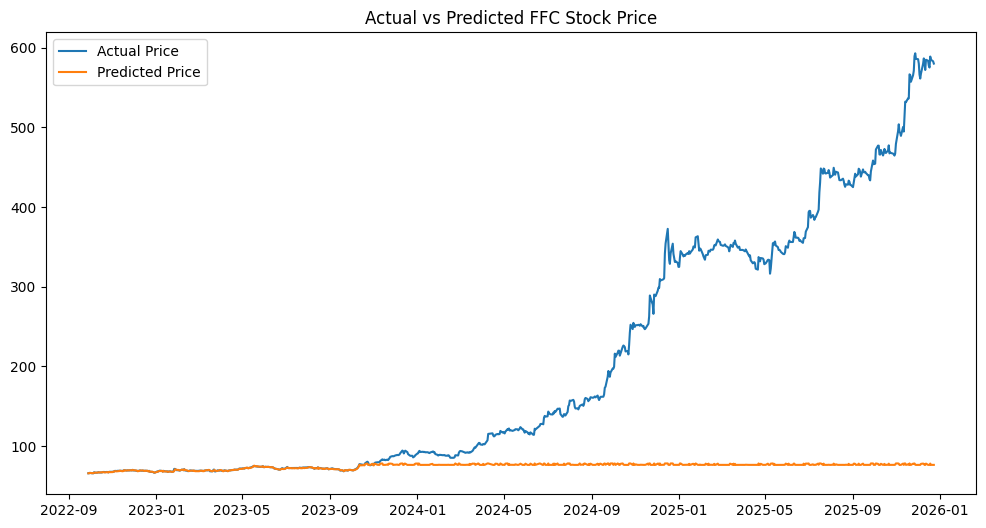

In [15]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Price")
plt.plot(y_test.index, y_pred, label="Predicted Price")
plt.legend()
plt.title("Actual vs Predicted FFC Stock Price")
plt.show()


In [16]:
# I am going to use Prophet Model
!pip install prophet

In [17]:
# Prophet use just two columns. So in this case, we use 'date' and 'close' columns
prophet_df = df.reset_index()[['Date', 'Close']]
prophet_df.columns = ['ds', 'y']
prophet_df.head()

,ds,y
0,2010-01-14,8.41622
1,2010-01-15,8.41622
2,2010-01-18,8.41622
3,2010-01-19,8.41622
4,2010-01-20,8.41622


In [18]:
# Train-Test-Split
train_size = int(len(prophet_df) * 0.8)
train = prophet_df.iloc[:train_size]
test = prophet_df.iloc[train_size:]

In [19]:
# Now, we will train the Prophet Model
from prophet import Prophet
model = Prophet(
daily_seasonality = False,
yearly_seasonality = True,
weekly_seasonality = True)
model.fit(train)

In [20]:
# Future Dates and Prediction
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

In [21]:
# Extract Test Prediction
pred = forecast[['ds','yhat']].iloc[train_size:]
pred.head()

,ds,yhat
3312,2022-09-28,69.483984
3313,2022-09-29,69.499784
3314,2022-09-30,69.542670
3315,2022-10-01,70.241451
3316,2022-10-02,70.243441


In [22]:
# Now see the evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test['y'], pred['yhat'])
rmse = np.sqrt(mean_squared_error(test['y'], pred['yhat']))
print("MAE :", mae)
print("RMSE:", rmse)

MAE : 123.75149314656866
RMSE: 192.28942366845925


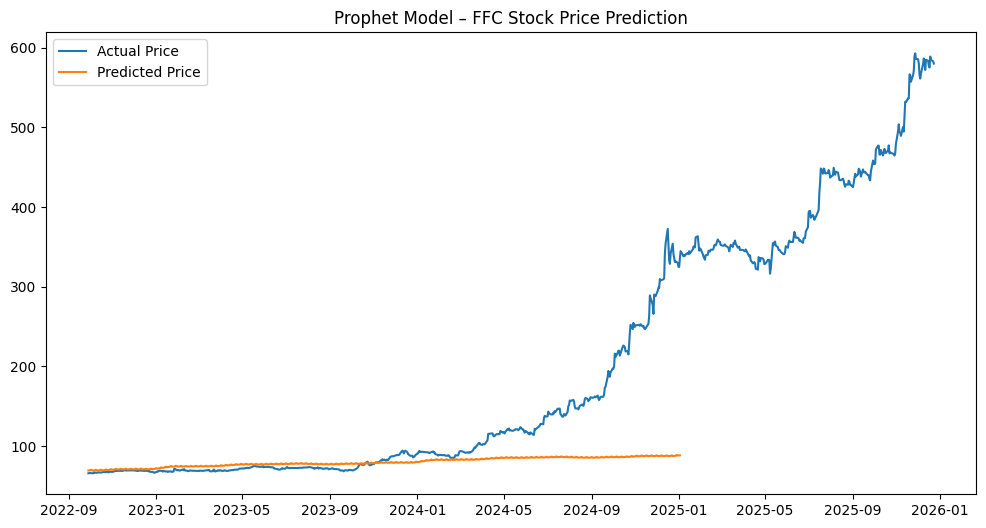

In [23]:
# Plot the graph
plt.figure(figsize=(12,6))
plt.plot(test['ds'], test['y'], label='Actual Price')
plt.plot(pred['ds'], pred['yhat'], label='Predicted Price')
plt.legend()
plt.title("Prophet Model – FFC Stock Price Prediction")
plt.show()

In [24]:
# Now we will see it through LSTM model
# Install libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [25]:
# we will just use close price
data = df[['Close']]
data.head()

Price,Close
Date,
2010-01-14,8.41622
2010-01-15,8.41622
2010-01-18,8.41622
2010-01-19,8.41622
2010-01-20,8.41622


In [26]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [27]:
# Sliding Window
X = []
y = []
window_size = 60
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

In [28]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [29]:
# Train Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [30]:
# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# Train the Model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1)

Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 4.5161e-04 - val_loss: 0.0022
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 2.3776e-05 - val_loss: 0.0028
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 2.0700e-05 - val_loss: 0.0023
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 1.7637e-05 - val_loss: 0.0019
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 1.6537e-05 - val_loss: 0.0023
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 1.4426e-05 - val_loss: 0.0011
Epoch 7/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 1.1821e-05 - val_loss: 0.0013
Epoch 8/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 1.2066e-05 - val_loss: 8.3214e-04
Epoch 9/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - loss: 1.1083e-05 - val_loss: 8.5949e-04
Epoch 10/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 1.2257e-05 - val_loss: 0.0010
Epoch 11/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 9.7523e-06 - val_

In [32]:
# Prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [33]:
# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae = mean_absolute_error(y_test_actual, predictions)
print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 14.543665793140793
MAE: 8.517796824960147


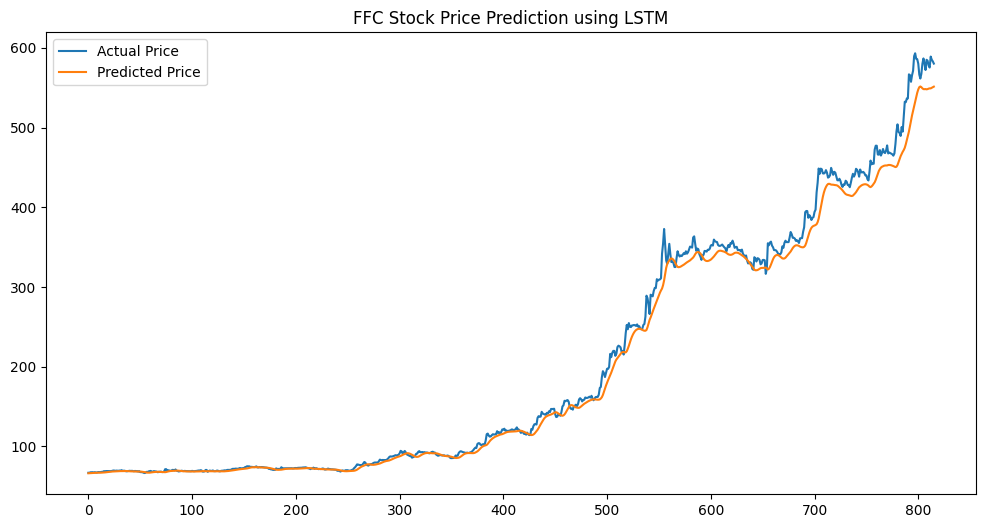

In [34]:
# Plot the graph
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.legend()
plt.title("FFC Stock Price Prediction using LSTM")
plt.show()